In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

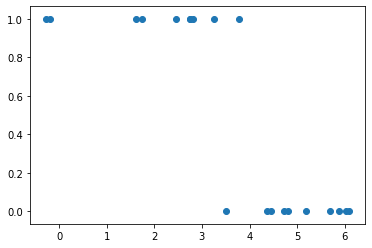

In [3]:
plt.scatter(xs, labels)

In [4]:
learning_rate = 0.001
training_epochs = 1000

In [5]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [6]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)),
                 tf.multiply(w[0], tf.pow(X, 0)))

In [7]:
w = tf.Variable([0.0, 0.], name = "parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y-y_model))

In [8]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [9]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict = {X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict = {X: xs, Y: labels})
    if epoch % 100 == 0:
        print(epoch, current_cost)

0 8.565466
100 3.0379512
200 1.9746224
300 1.7643256
400 1.7227346
500 1.7145092
600 1.7128826
700 1.7125609
800 1.7124972
900 1.7124848


In [11]:
w_val = sess.run(w)
print('learned params', w_val)

learned params [ 1.2819738 -0.2187987]


In [12]:
current_prediction = tf.equal(Y, tf.to_float(tf.greater(y_model, 0.5)))
accuracy = tf.reduce_mean(tf.to_float(current_prediction))

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

Instructions for updating:
Use `tf.cast` instead.
accuracy 0.9


In [13]:
sess.close()

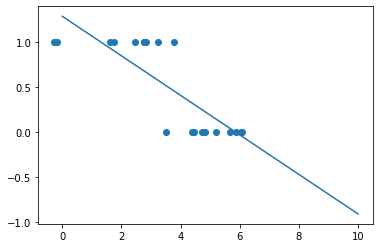

In [14]:
all_xs = np.linspace(0, 10, 100)
plt.scatter(xs, labels)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.show()